[< list of demos](Introduction.ipynb#demos)

<a id='top'></a>
# Single star orbit fit - Tau Ceti

This demo shows how to fit a binary model to data, using [Tau Ceti](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Tau+Ceti) as an example.

**Note:** This demo illustrates MCMC fitting setup and due to a large number of parameters it can take a long time (~10s of minutes in this case) to converge depending on your CPU and a number of cores you set. 

## Arguments:

`-m fit` - PEXO mode

`-p HD10700` - primary star. PEXO retieves target information from Simbad and astrometry from Gaia/Hipparcos

`-N 100` - number of MCMC walkers

`-n 4` - number of cores to use, default: 4

`-o ../results/tauCeti-fit.Robj` - output file

### Parameter file

To specify binary system parameters, create a `.par` file with stellar parameters. Save the file to `pexo/input/<starname>.par` and PEXO will find it using the primary star name you specify.

See the example file [here](../input/HD10700pfs.par) and refer to the [documentation](https://rpubs.com/Fabo/pexo2).

## Run the code

Execute PEXO with the command below. This may take a few minutes to compute.

In [1]:
# cd into the code directory
%cd ../code

# run PEXO via the R script
! Rscript pexo.R -m fit -p HD10700 -N 100 -n 4 -o ../results/tauCeti-fit.Robj

/home/timberhill/repositories/pexo/code
Warning message:
package ‘optparse’ was built under R version 3.6.3 
Loading required package: polynom
Warning messages:
1: package ‘orthopolynom’ was built under R version 3.6.3 
2: package ‘polynom’ was built under R version 3.6.3 

Attaching package: ‘pracma’

The following object is masked from ‘package:polynom’:

    integral

Warning message:
package ‘pracma’ was built under R version 3.6.3 
Warning message:
package ‘foreach’ was built under R version 3.6.3 
Loading required package: iterators
Loading required package: parallel
Warning messages:
1: package ‘doMC’ was built under R version 3.6.3 
2: package ‘iterators’ was built under R version 3.6.3 

Attaching package: ‘e1071’

The following object is masked from ‘package:pracma’:

    sigmoid

Warning message:
package ‘e1071’ was built under R version 3.6.3 
Warning message:
package ‘MASS’ was built under R version 3.6.3 
Loading required package: spam
Loading required package: dotCall64


## Output

The output file (`"../results/tauCeti-fit.Robj"`) is an R object that contins all the information about the computation process. 

### Data vs model:

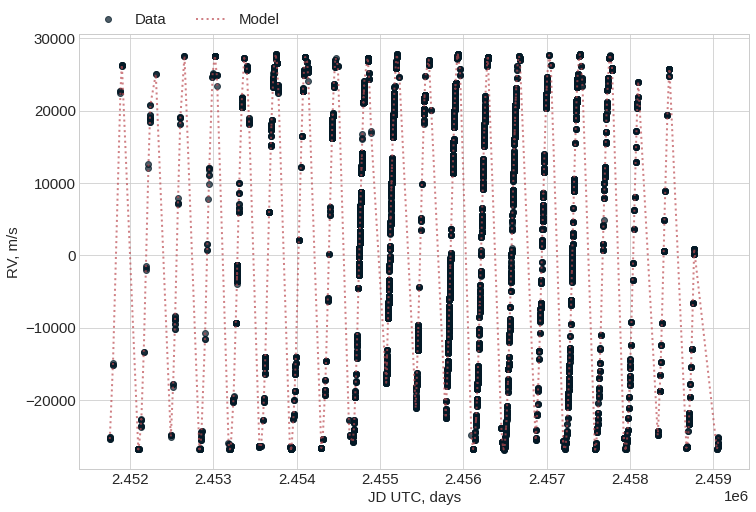

In [1]:
from utilities import FitOutput, Plot, Table
output = FitOutput("../results/tauCeti-fit.Robj")
p = Plot(data=output.data.dictionary).add_plot(xcol="utc", ycol="V1", marker="o", legend="Data")
p = Plot(data=output.model.dictionary, plot_instance=p).add_plot(xcol="utc", ycol="V1", line=":", colour="#BC4B51", legend="Model")
o=p.axis.set_xlabel("JD UTC, days")
o=p.axis.set_ylabel("RV, m/s")

### Fitted values and their statistical properties:

In [8]:
Table(lines=[" ".join([str(x) for x in line]) for line in output.parstat], take_all=True, header=0, left_header=0, digits=5)

,xopt,x1per,x99per,x10per,x90per,xminus,xplus,mode,mean,sd,skewness,kurtosis
raOff,-0.00061,-0.00061,-0.00043,-0.00061,-0.00043,-0.00061,-0.00061,-0.00061,-0.00058,6.29250,2.04656,2.23337
decOff,0.00094,0.00094,0.00095,0.00094,0.00095,0.00094,0.00094,0.00094,0.00094,3.12548,2.04656,2.23337
pmraOff,0.00096,0.00096,0.00098,0.00096,0.00098,0.00096,0.00096,0.00096,0.00096,5.51340,2.04656,2.23337
pmdecOff,0.00041,0.00041,0.00068,0.00041,0.00068,0.00041,0.00041,0.00041,0.00045,9.05762,2.04656,2.23337
plxOff,0.00022,-4.81889,0.00022,-4.81889,0.00022,0.00022,0.00022,0.00022,0.00018,9.34986,-2.04656,2.23337
logjitterRv.HD10700.APF,0.00162,0.00162,0.00170,0.00162,0.00170,0.00162,0.00162,0.00162,0.00163,2.73414,2.04656,2.23337
bRv.HD10700.APF,-0.00576,-0.00588,-0.00576,-0.00588,-0.00576,-0.00576,-0.00576,-0.00576,-0.00578,4.08513,-2.04656,2.23337
logjitterRv.HD10700.HARPSpost,-0.00045,-0.00061,-0.00045,-0.00061,-0.00045,-0.00045,-0.00045,-0.00045,-0.00047,5.58306,-2.04656,2.23337
bRv.HD10700.HARPSpost,-0.00482,-0.00482,-0.00478,-0.00482,-0.00478,-0.00482,-0.00482,-0.00482,-0.00481,1.31094,2.04656,2.23337
logjitterRv.HD10700.HARPSpre,0.00171,0.00165,0.00171,0.00165,0.00171,0.00171,0.00171,0.00171,0.00170,1.80498,-2.04656,2.23337
